In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd 

In [2]:
#plt.style.use('Solarize_Light2')
#plt.style.use('dark_background')
#plt.style.use('classic')
#plt.style.use('seaborn')
#plt.style.use('ggplot')
#plt.style.use('seaborn-darkgrid')
#plt.style.use('seaborn-white')
plt.style.use('fivethirtyeight')

In [3]:
def getInformation(data, country_id):
    print(country_id)
    suma = np.zeros(77)
    for i in country_id:
        country = data.loc[[i]]
        dummy = country.values[0][4:]
        suma = suma + dummy
    return suma[suma >= 1]

def calcFactor(x):
    suma = 0
    N = len(x)
    for i,p in enumerate(range(N-1)):
        suma +=  x[i+1]/x[i]
    
    F = suma / (N - 1)
    return N, F

def forecast(days, factor, start):
    xp = [start]
    for i in range(1, days):
        xp.append(xp[i-1] * factor)
    return xp

In [ ]:
file = 'time_series_covid19_confirmed_global.csv'
#path = '/home/luiggi/GitSites/COVID-19/csse_covid_19_data/csse_covid_19_time_series/'
covid = pd.read_csv(file)

In [4]:
file = 'time_series_covid19_deaths_global.csv'
#path = '/home/luiggi/GitSites/COVID-19/csse_covid_19_data/csse_covid_19_time_series/'
covid = pd.read_csv(file)

In [ ]:
file = 'time_series_covid19_recovered_global.csv'
#path = '/home/luiggi/GitSites/COVID-19/csse_covid_19_data/csse_covid_19_time_series/'
covid = pd.read_csv(file)

In [ ]:
for i, p in enumerate(covid['Country/Region']):
    if p == 'Ecuador':
        print(i,p)

In [ ]:
#covid.loc[[p for p in range(231,247)]]
covid.loc[[225]]

In [5]:
# Confirmed
row_ecu = [97]
row_fra = [116]
row_ger = [120]
row_ita = [137]
row_mex = [158]
row_spa = [201]
row_uk = [223]
row_can = [35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 231, 238, 245, 246]
#row_can = [36] # Recovered
row_usa = [225]

country = {'ecu':row_ecu,
#           'fra':row_fra, 
#           'ger':row_ger, 
#           'ita':row_ita, 
           'mex':row_mex, 
#           'spa':row_spa, 
#           'uk': row_uk, 
           'can':row_can, 
           'usa':row_usa}
country_color = {'ecu':'grey',
#                 'fra':'#7CCBA2',#'lightsteelblue', 
#                 'ger':'peachpuff', 
#                 'ita':'lightgreen', 
                 'mex':'grey', 
#                 'spa':'mistyrose', 
#                 'uk':'thistle', 
                 'can':'orchid', 
                 'usa':'blue'}
for k in country:
    print(k, country[k], country_color[k])

ecu [97] grey
mex [158] grey
can [35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 231, 238, 245, 246] orchid
usa [225] blue


In [6]:
country_info = {}
for k in country:
    country_info[k] = getInformation(covid, country[k])
country_info

[97]
[158]
[35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 231, 238, 245, 246]
[225]


{'ecu': array([2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 5.0, 7.0, 14.0, 18.0, 27.0, 28.0,
        34.0, 36.0, 48.0, 58.0, 60.0, 75.0, 93.0, 120.0, 145.0, 172.0,
        180.0, 191.0, 191.0], dtype=object),
 'mex': array([1.0, 1.0, 2.0, 2.0, 3.0, 4.0, 5.0, 6.0, 8.0, 12.0, 16.0, 20.0,
        28.0, 29.0, 37.0, 50.0, 60.0, 79.0, 94.0, 125.0], dtype=object),
 'can': array([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 4.0, 5.0, 8.0, 9.0, 12.0, 19.0,
        21.0, 25.0, 26.0, 30.0, 38.0, 54.0, 61.0, 64.0, 80.0, 101.0, 109.0,
        139.0, 179.0, 218.0, 259.0, 339.0, 375.0], dtype=object),
 'usa': array([1.0, 1.0, 6.0, 7.0, 11.0, 12.0, 14.0, 17.0, 21.0, 22.0, 28.0, 36.0,
        40.0, 47.0, 54.0, 63.0, 85.0, 108.0, 118.0, 200.0, 244.0, 307.0,
        417.0, 557.0, 706.0, 942.0, 1209.0, 1581.0, 2026.0, 2467.0, 2978.0,
        3873.0, 4757.0, 5926.0, 7087.0, 8407.0, 9619.0, 10783.0, 12722.0],
       dtype=object)}

In [ ]:
# Mexico corrección - Confirmados
mex_list = list(country_info['mex'])
mex_list.append(2785)
print(mex_list)
country_info['mex'] = np.array(mex_list)
country_info['mex']

In [7]:
# Mexico corrección - Defunciones
mex_list = list(country_info['mex'])#.append(848)
mex_list.append(141)
print(mex_list)
country_info['mex'] = np.array(mex_list)
country_info['mex']

[1.0, 1.0, 2.0, 2.0, 3.0, 4.0, 5.0, 6.0, 8.0, 12.0, 16.0, 20.0, 28.0, 29.0, 37.0, 50.0, 60.0, 79.0, 94.0, 125.0, 141]


array([  1.,   1.,   2.,   2.,   3.,   4.,   5.,   6.,   8.,  12.,  16.,
        20.,  28.,  29.,  37.,  50.,  60.,  79.,  94., 125., 141.])

In [8]:
thr = 1
days_forecast = 70

In [9]:
country_factor = {}
for k in country_info:
    country_factor[k] = calcFactor(country_info[k][country_info[k] >= thr])
#country_factor

In [10]:
country_forecast = {}
for k in country_factor:
    country_forecast[k] = forecast(days_forecast, country_factor[k][1], thr)
#country_forecast

In [15]:
total_days = 28
xts = np.arange(0,total_days,7)

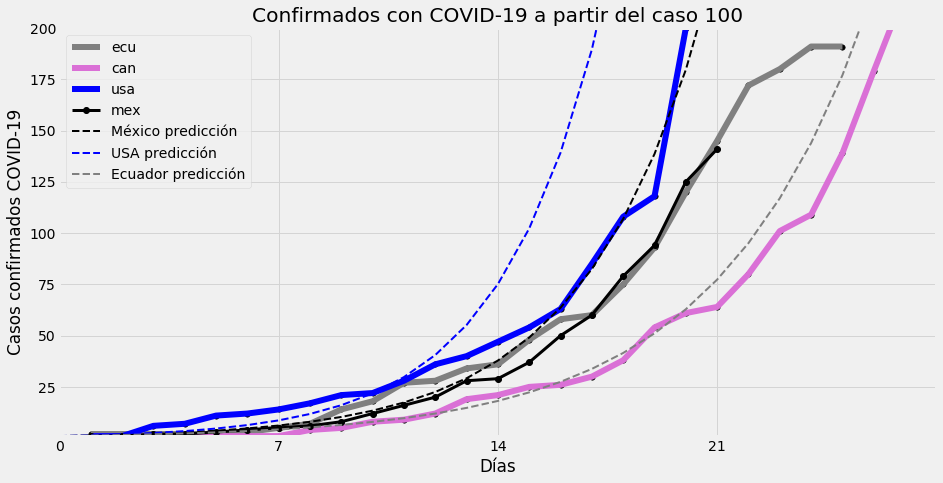

In [19]:
fig = plt.figure(figsize=(14,7))
for k in country_info:
#    print(k, sep='\t')
    pais = country_info[k][country_info[k] >= thr]
    xp = [x for x in range(1,len(pais)+1)]
    par = {'marker':'', 'lw':'-', 'lw':6.00, 'c':country_color[k], 'label':k}
    pars = {'marker':'o', 's':30.0, 'c':'k'}#country_color[k]}
    if k != 'mex':
#        plt.scatter(xp[-2:], pais[-2:], **pars)
        plt.scatter(xp, pais, **pars)
        plt.plot(xp, pais, **par)
#        plt.text(x = xp[-1], y = pais[-1], c = country_color[k], s = k, weight = 'bold')
    
    
par = {'marker':'o', 'lw':'-', 'lw':3.00, 'c':'k', 'label':'mex'}
pais = country_info['mex'][country_info['mex'] >= thr]
xp = [x for x in range(1,len(pais)+1)]
plt.plot(xp, pais, **par)

plt.plot(country_forecast['mex'],'--', lw = 2.0, c = 'k', label = 'México predicción')
plt.plot(country_forecast['usa'],'--', lw = 2.0, c = 'b', label = 'USA predicción')
plt.plot(country_forecast['ecu'],'--', lw = 2.0, c = 'gray', label = 'Ecuador predicción')

plt.xlim([1,total_days])#1 * len(Italy)])
plt.ylim([thr-0.1,200])
plt.xlabel('Días')
plt.ylabel('Casos confirmados COVID-19')
#plt.ylabel('Defunciones COVID-19')
#plt.yscale('log')
plt.xticks(ticks=xts, labels=xts)#, rotation='vertical')
plt.minorticks_on()
plt.legend()
plt.grid(color='#d4d4d4')
plt.title('Confirmados con COVID-19 a partir del caso 100')
#plt.title('Defunciones desde el primer registro ...')
#plt.savefig('Confirmados290320_02_.png')
#plt.savefig('Defunciones290320.png')
plt.show()